# Imports

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import HistGradientBoostingRegressor

In [2]:
from dstoolkit.feature_engine import SimpleLagTimeFeatureCreator

In [3]:
from dstoolkit.automl import AutoMLHistGradientBoostingRegressor, AutoMLHistGradientBoostingRegressorCV 

/home/junior/GitHub/data-science-toolkit/venv/lib64/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Regressor

In [4]:
df = pd.read_csv('../data/global_temperature_time_series.csv', )
df['time'] = pd.to_datetime(df['Year'])
df = df.drop(columns=['Source', 'Year']).rename(columns={'Mean': 'temperature'})

s = SimpleLagTimeFeatureCreator([2, 3, 4, 5, 6], ["mean", "median", "max", "min", "std", "diff", "slope"])
df1 = s.create(df, target='temperature', time='time')
df1 = df1.dropna()

X = df1.drop(columns=['time', 'temperature'])
y = df1[['temperature']]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.55, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, train_size=0.6, random_state=42)

In [5]:
rfe = SequentialFeatureSelector(
    HistGradientBoostingRegressor(), 
    n_features_to_select=20, 
    direction='forward', 
    scoring='r2', 
    cv=3
)
rfe.fit(X_train, y_train['temperature'])

best_features_reg = X_train.loc[:, rfe.get_support()].columns.tolist()

In [6]:
a = AutoMLHistGradientBoostingRegressor(
    X_train, y_train, 
    X_valid, y_valid,
    X_test, y_test,
    target='temperature',
    best_features=best_features_reg,
    n_trials=50,
    scoring='r2'
)

In [7]:
a.train()

In [8]:
a.get_metrics()

Dataset        R2       MAE     MadAE          MAPE      RMSE  \
0   Train  0.987061  0.035098  0.028054  4.986462e+11  0.045810   
1   Valid  0.911054  0.091636  0.072543  2.915471e+12  0.119863   
2    Test  0.914148  0.093742  0.072704  1.285995e+00  0.123049   
3   Train  0.980432  0.042842  0.033465  6.292168e+11  0.056335   
4   Valid  0.905978  0.093490  0.073280  3.310857e+12  0.123236   
5    Test  0.914413  0.093999  0.072428  1.271637e+00  0.122859   
6   Train  0.943296  0.073009  0.056198  9.441464e+11  0.095898   
7   Valid  0.914992  0.089474  0.069965  3.189355e+12  0.117180   
8    Test  0.921482  0.089948  0.069779  1.193725e+00  0.117676   

   Explained Variance               Model  
0            0.987061          Base Model  
1            0.911058          Base Model  
2            0.914290          Base Model  
3            0.980432  Best Feature Model  
4            0.905982  Best Feature Model  
5            0.914767  Best Feature Model  
6            0.943296   Best Params Model  
7            0.914994   Best Params Model  
8            0.921704   Best Params Model

base_model Results


Dataset        R2       MAE     MadAE          MAPE      RMSE  \
0   Train  0.987061  0.035098  0.028054  4.986462e+11  0.045810   
1   Valid  0.911054  0.091636  0.072543  2.915471e+12  0.119863   
2    Test  0.914148  0.093742  0.072704  1.285995e+00  0.123049   

   Explained Variance  
0            0.987061  
1            0.911058  
2            0.914290

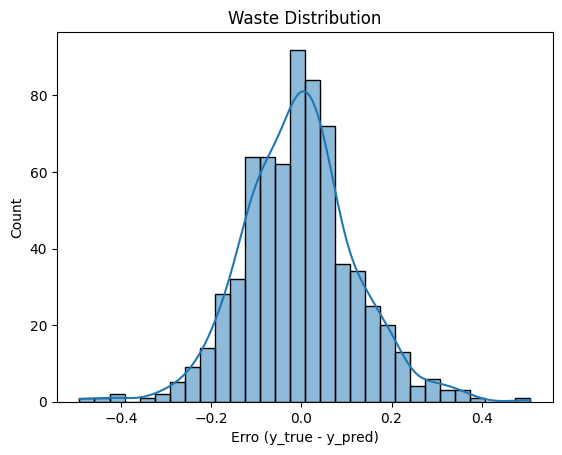

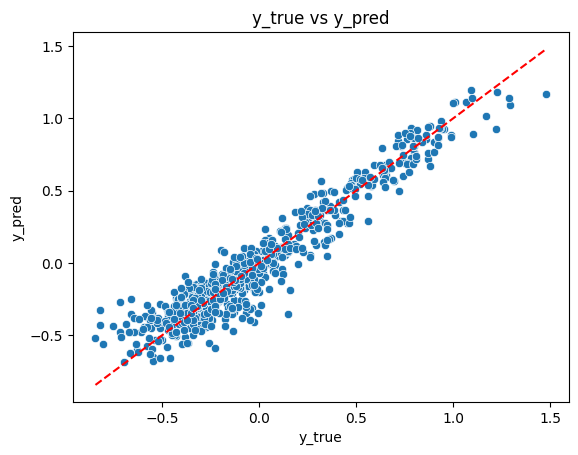

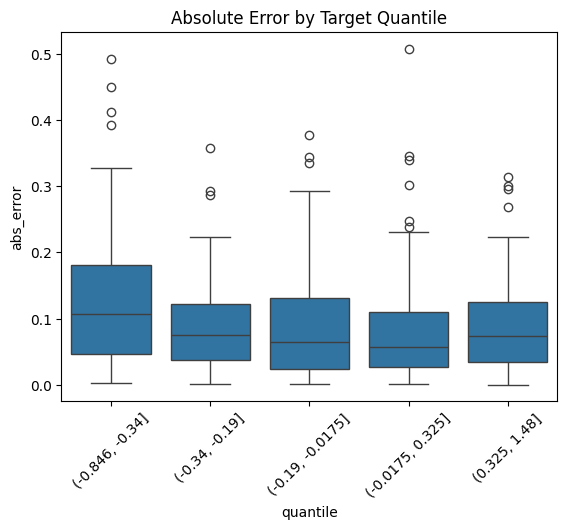

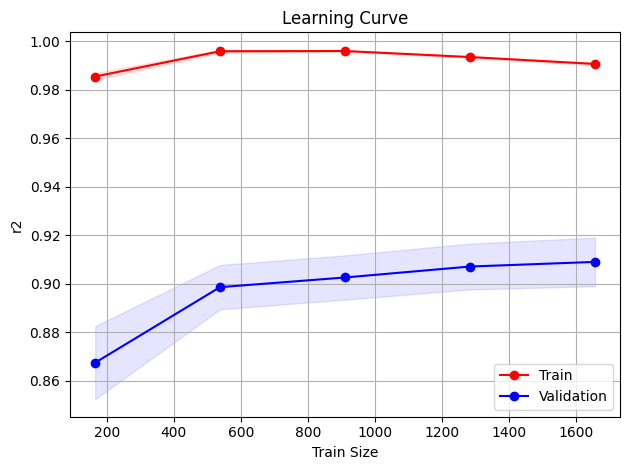

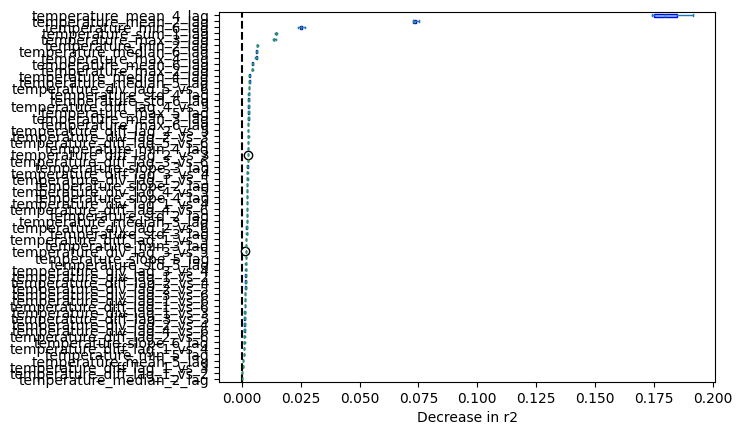

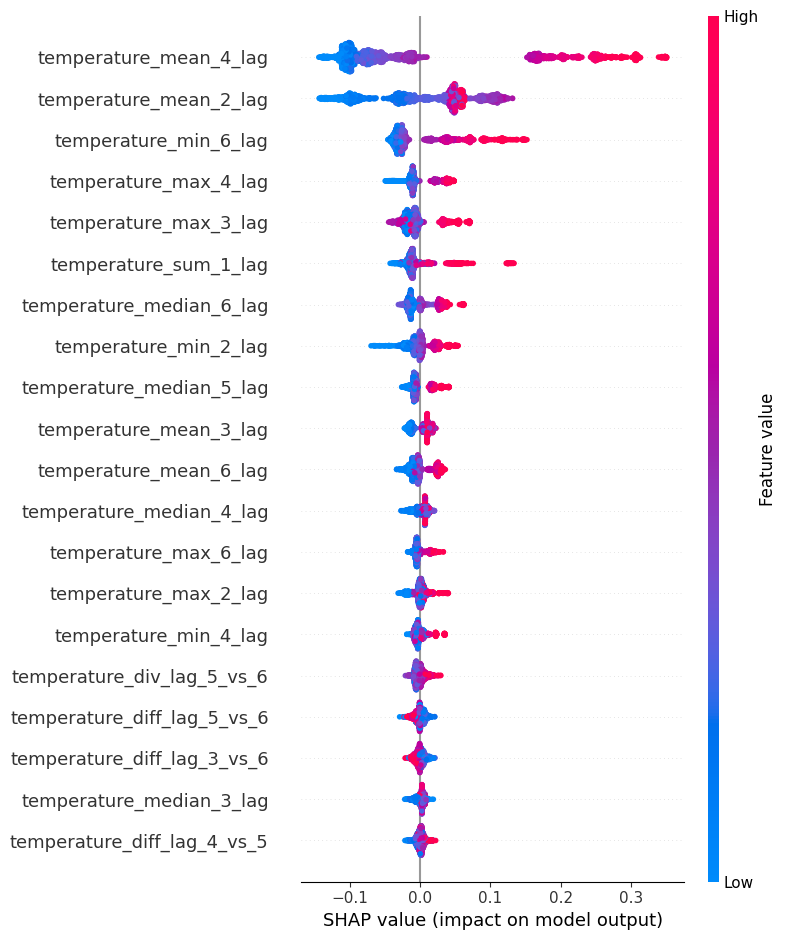

best_feature_model Results


Dataset        R2       MAE     MadAE          MAPE      RMSE  \
0   Train  0.980432  0.042842  0.033465  6.292168e+11  0.056335   
1   Valid  0.905978  0.093490  0.073280  3.310857e+12  0.123236   
2    Test  0.914413  0.093999  0.072428  1.271637e+00  0.122859   

   Explained Variance  
0            0.980432  
1            0.905982  
2            0.914767

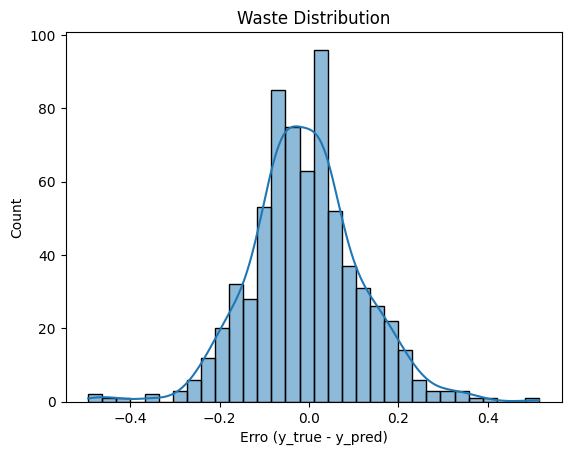

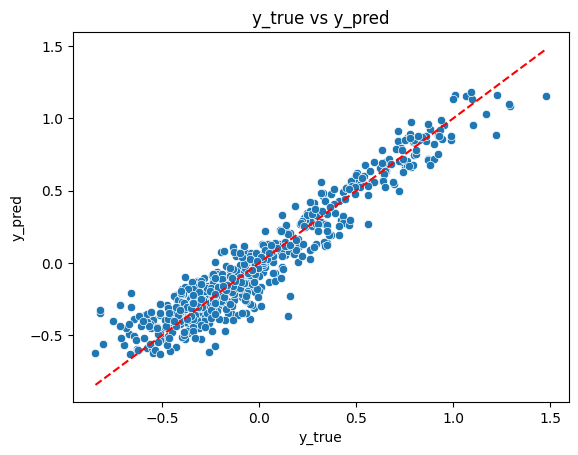

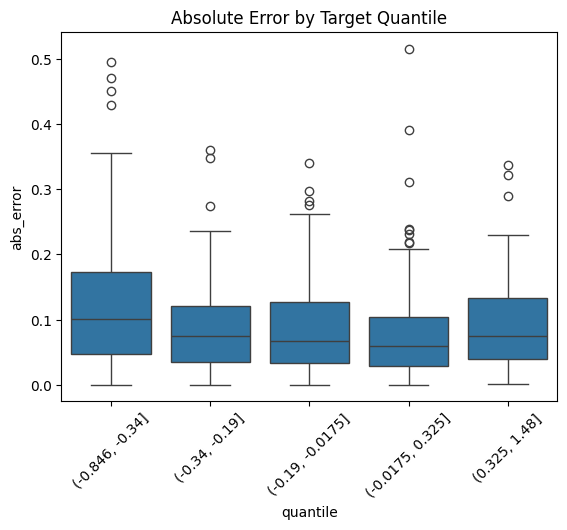

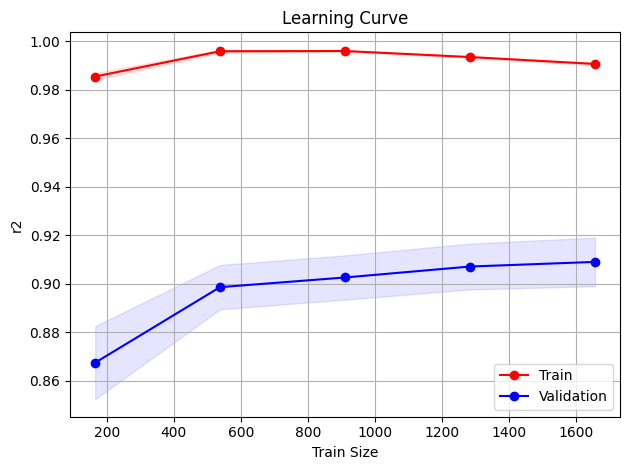

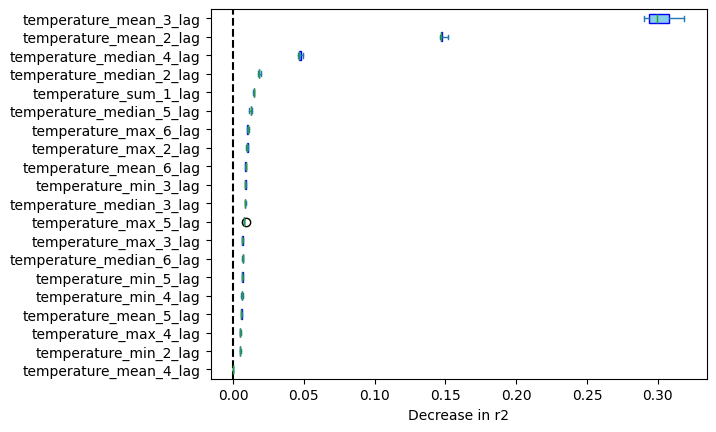

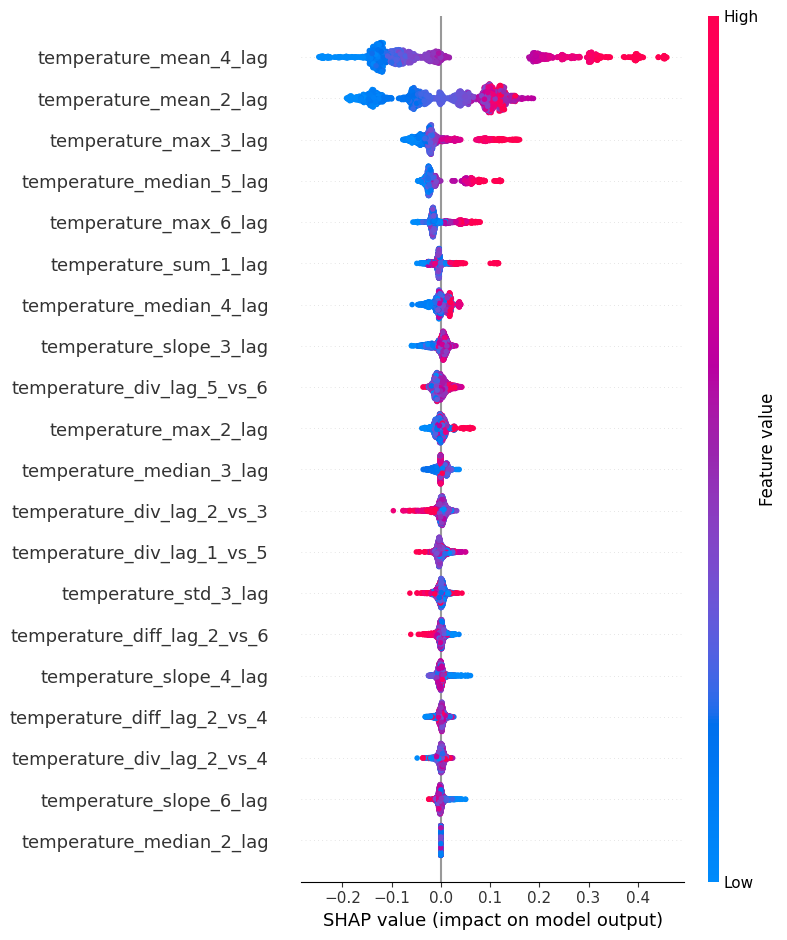

best_params_model Results


Dataset        R2       MAE     MadAE          MAPE      RMSE  \
0   Train  0.943296  0.073009  0.056198  9.441464e+11  0.095898   
1   Valid  0.914992  0.089474  0.069965  3.189355e+12  0.117180   
2    Test  0.921482  0.089948  0.069779  1.193725e+00  0.117676   

   Explained Variance  
0            0.943296  
1            0.914994  
2            0.921704

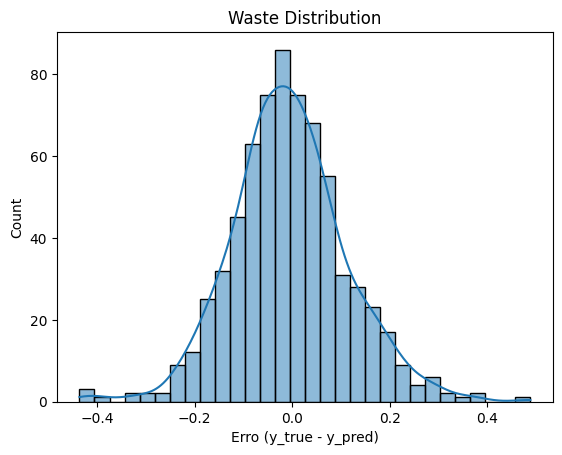

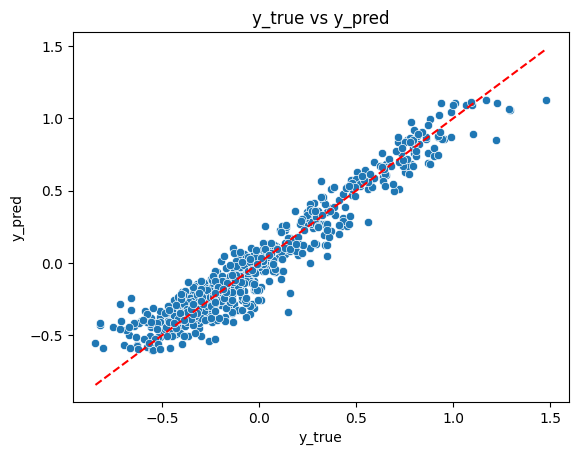

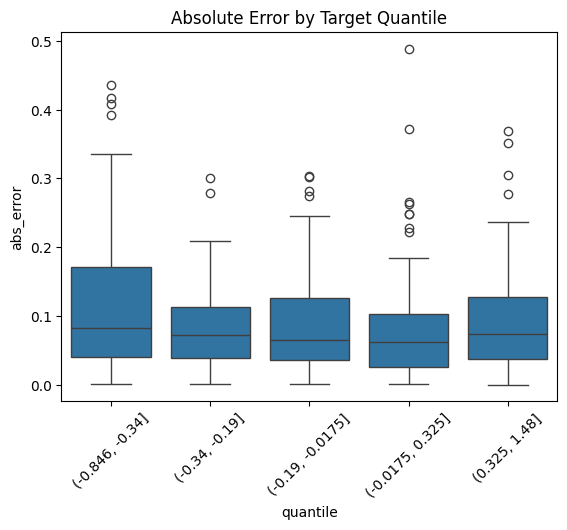

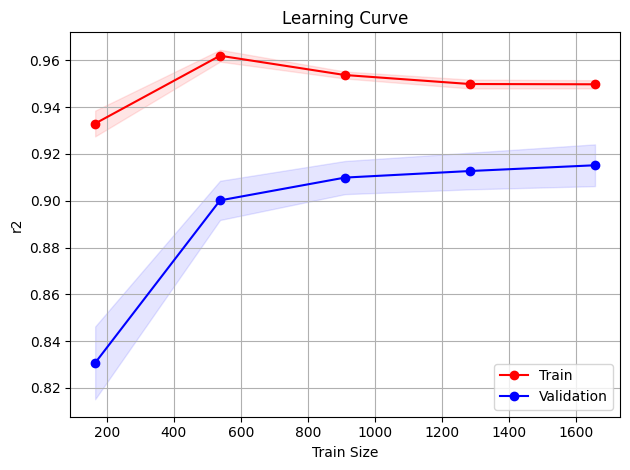

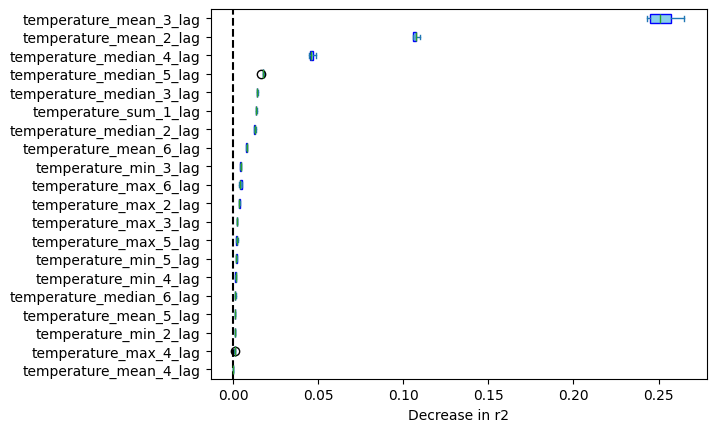

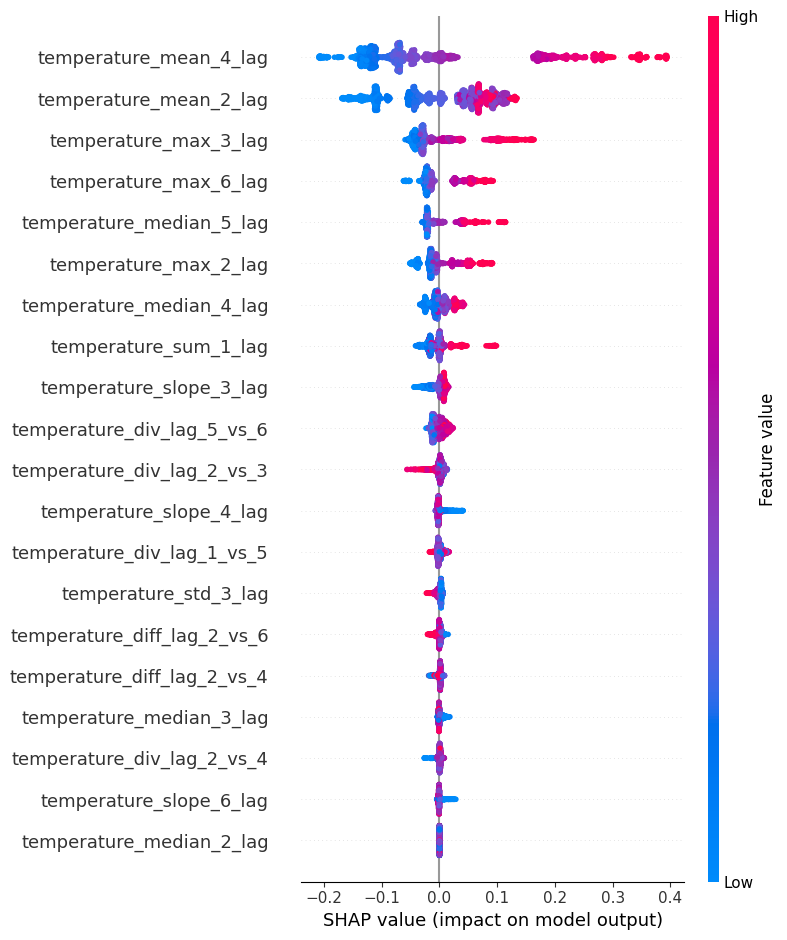

In [9]:
a.get_result_analysis()

In [10]:
acv = AutoMLHistGradientBoostingRegressorCV(
    X_train, y_train, 
    X_test, y_test,
    target='temperature',
    best_features=best_features_reg,
    n_trials=50,
    scoring='r2'
)

In [11]:
acv.train()

In [12]:
acv.get_metrics()

Dataset        R2       MAE     MadAE          MAPE      RMSE  \
0  Train CV  0.911292  0.090497  0.071921  1.051945e+12  0.119307   
1      Test  0.914148  0.093742  0.072704  1.285995e+00  0.123049   
2  Train CV  0.914274  0.089026  0.070011  1.179612e+12  0.117307   
3      Test  0.914413  0.093999  0.072428  1.271637e+00  0.122859   
4  Train CV  0.916922  0.087432  0.067494  1.045064e+12  0.115556   
5      Test  0.917510  0.093361  0.071985  1.266852e+00  0.120616   

   Explained Variance               Model  
0            0.911478          Base Model  
1            0.914290          Base Model  
2            0.914454  Best Feature Model  
3            0.914767  Best Feature Model  
4            0.917142   Best Params Model  
5            0.917817   Best Params Model

base_model Results


Dataset        R2       MAE     MadAE          MAPE      RMSE  \
0  Train CV  0.911292  0.090497  0.071921  1.051945e+12  0.119307   
1      Test  0.914148  0.093742  0.072704  1.285995e+00  0.123049   

   Explained Variance  
0            0.911478  
1            0.914290

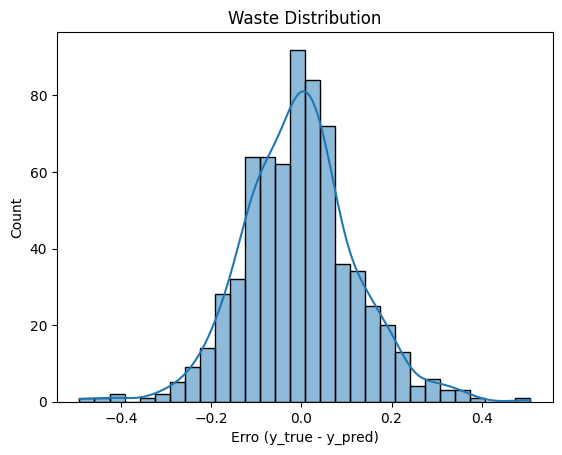

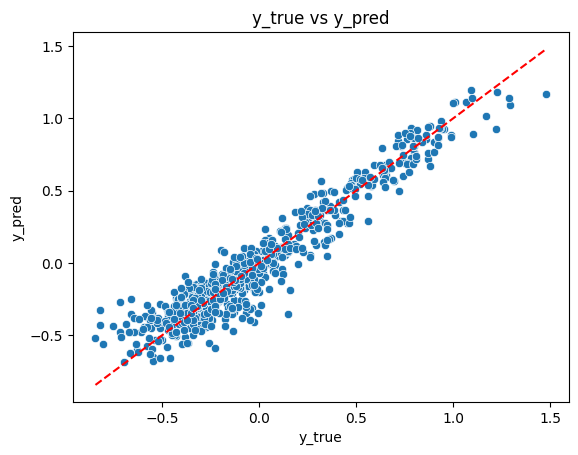

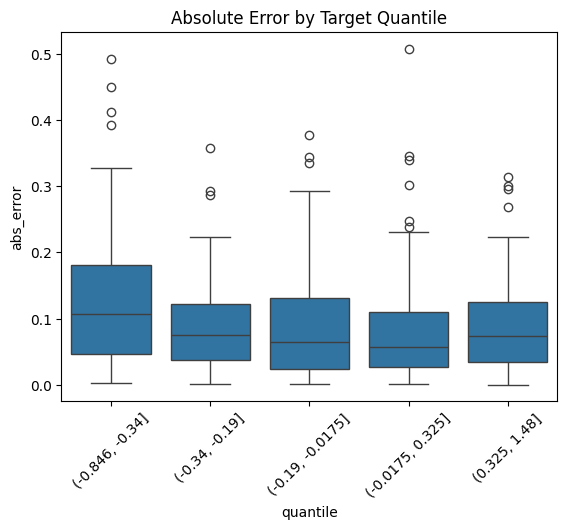

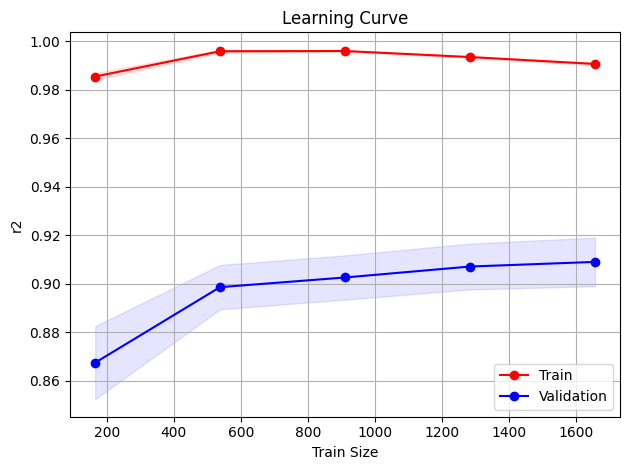

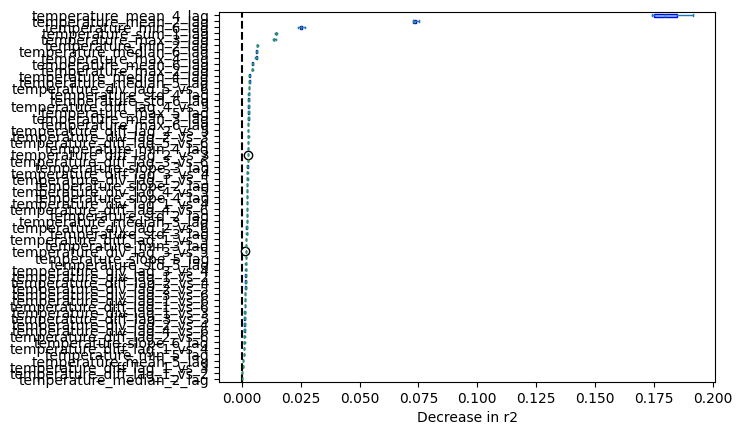

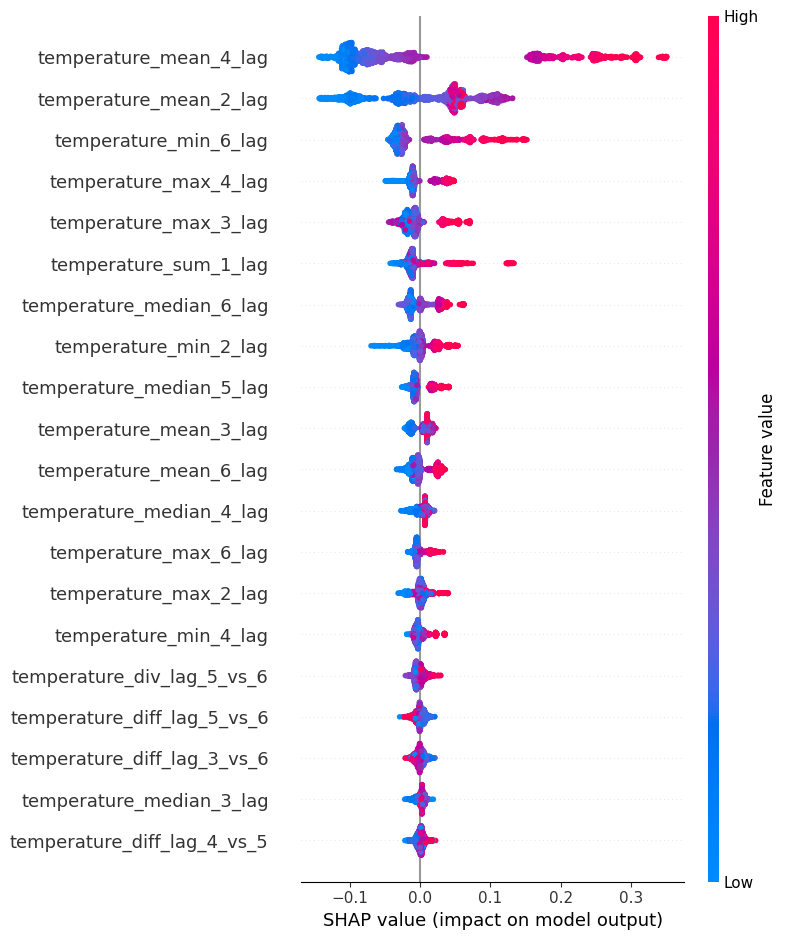

best_feature_model Results


Dataset        R2       MAE     MadAE          MAPE      RMSE  \
0  Train CV  0.914274  0.089026  0.070011  1.179612e+12  0.117307   
1      Test  0.914413  0.093999  0.072428  1.271637e+00  0.122859   

   Explained Variance  
0            0.914454  
1            0.914767

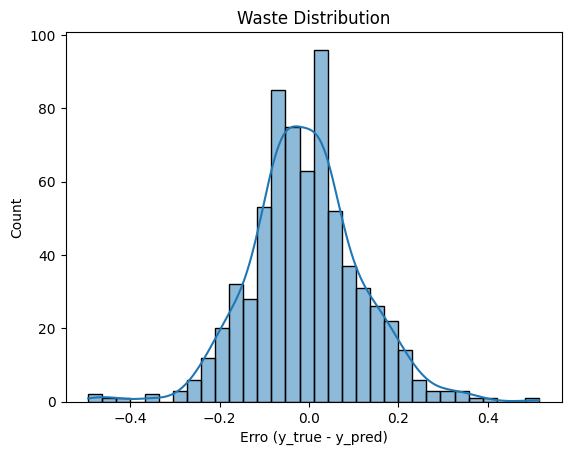

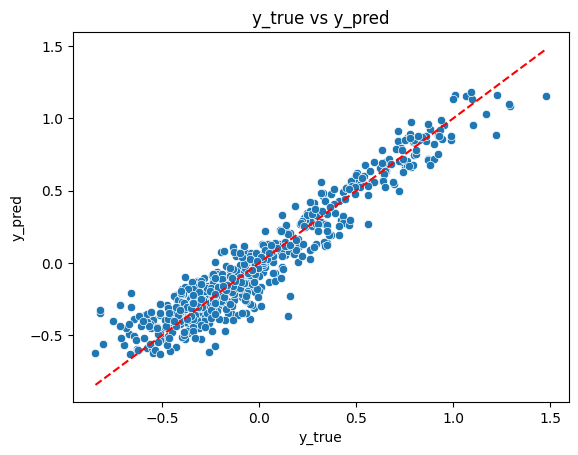

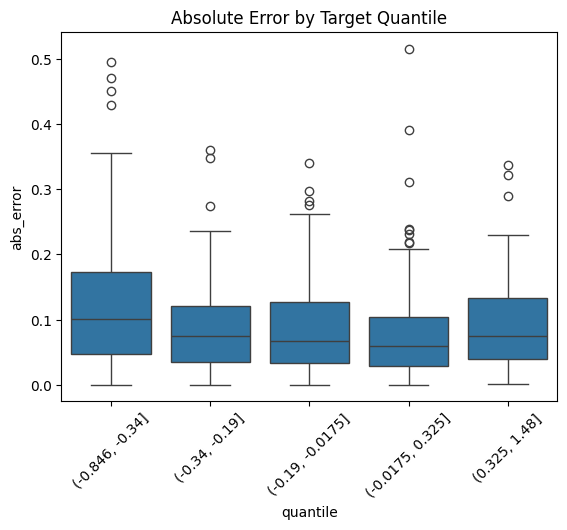

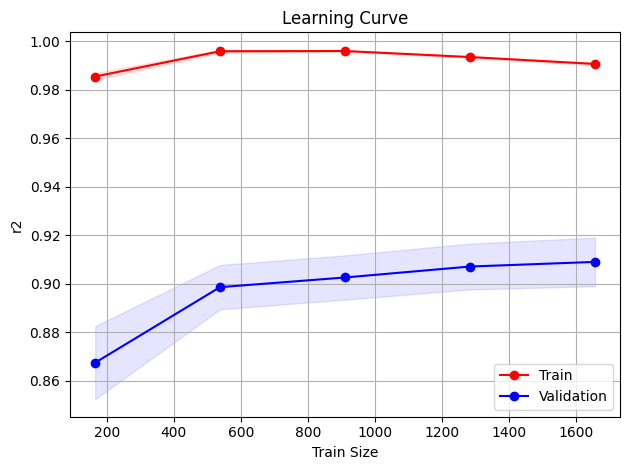

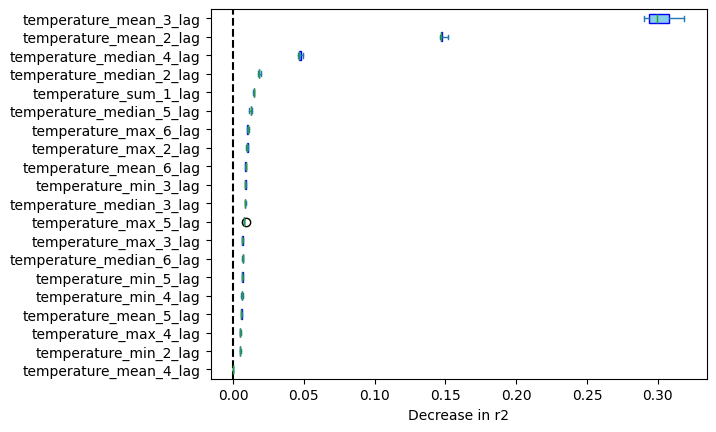

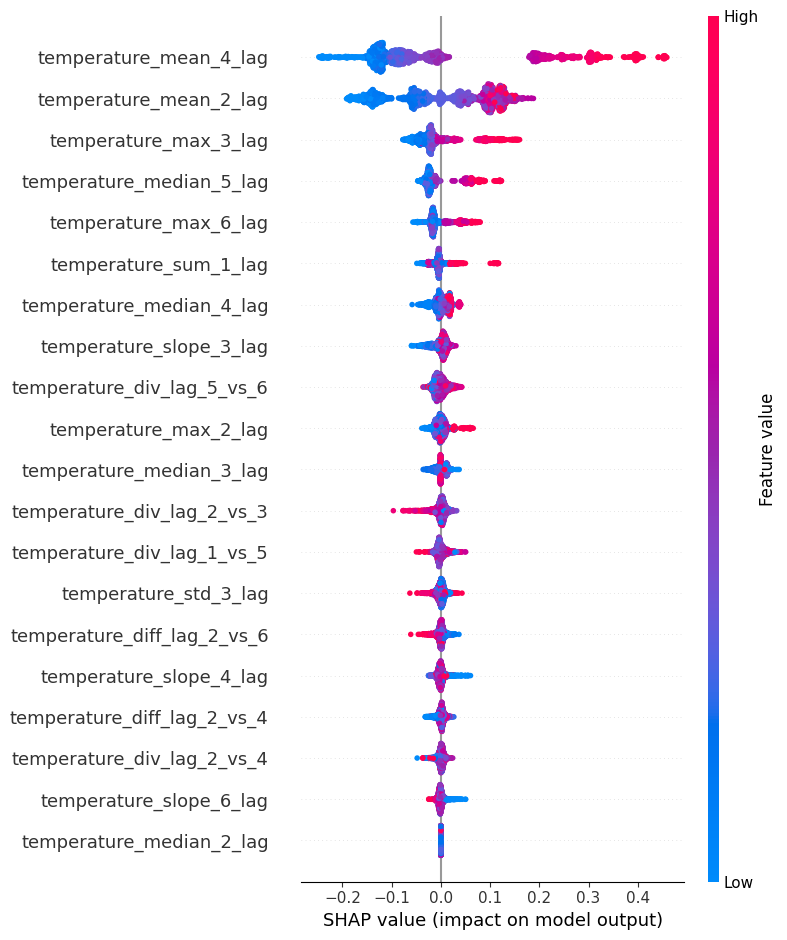

best_params_model Results


Dataset        R2       MAE     MadAE          MAPE      RMSE  \
0  Train CV  0.916922  0.087432  0.067494  1.045064e+12  0.115556   
1      Test  0.917510  0.093361  0.071985  1.266852e+00  0.120616   

   Explained Variance  
0            0.917142  
1            0.917817

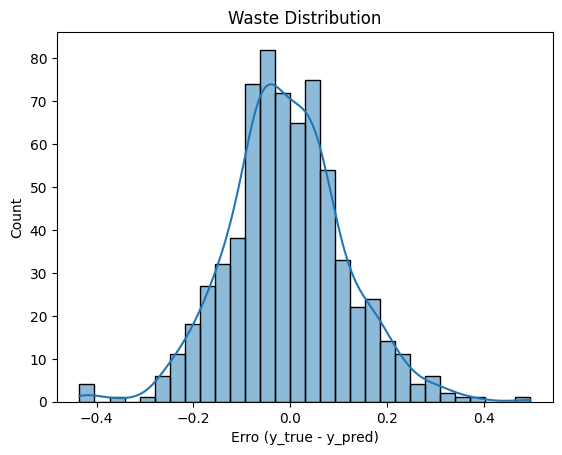

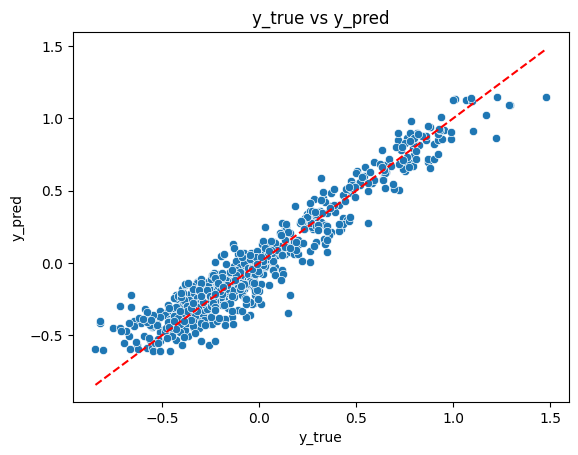

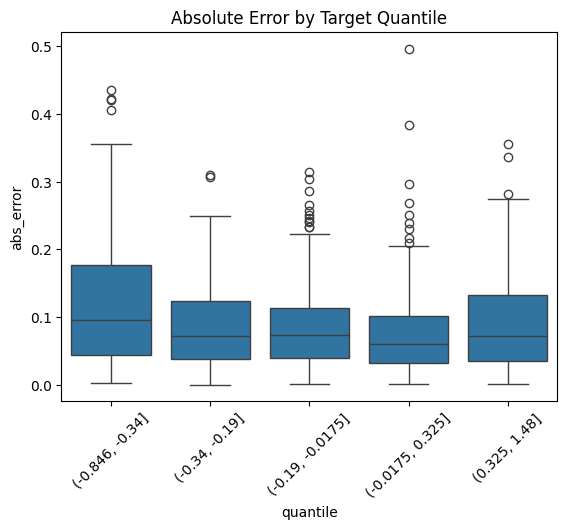

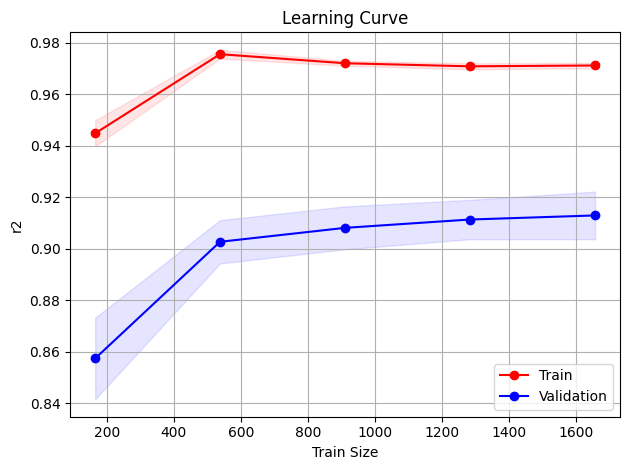

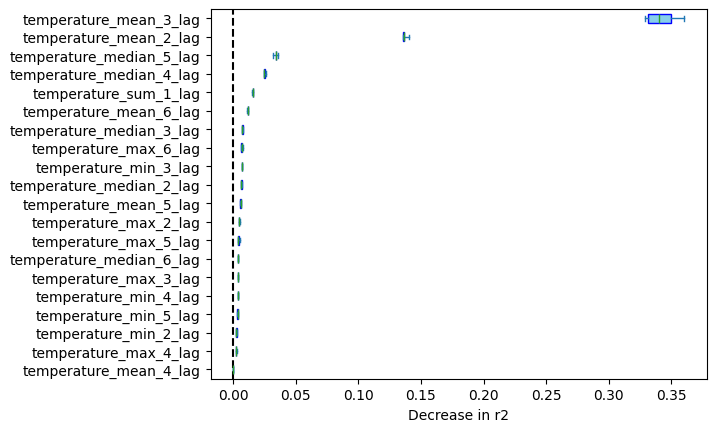

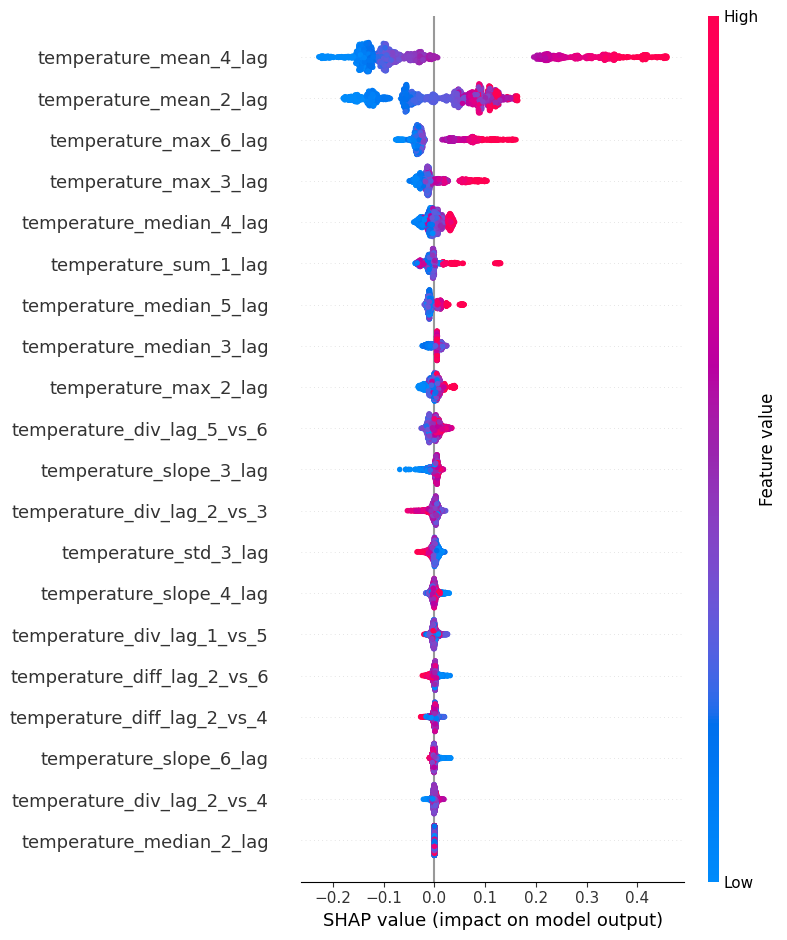

In [13]:
acv.get_result_analysis()

# Classifier

In [14]:
from dstoolkit.automl import AutoMLHistGradientBoostingClassifier, AutoMLHistGradientBoostingClassifierCV
from sklearn.ensemble import HistGradientBoostingClassifier

In [15]:
df = pd.read_csv('../data/cs-training.csv')

X = df.drop(['SeriousDlqin2yrs', 'Unnamed: 0'], axis=1)
y = df[['SeriousDlqin2yrs']].rename({'SeriousDlqin2yrs': 'target'}, axis=1)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.6, random_state=42, stratify=y['target'])
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, train_size=0.6, random_state=42, stratify=y_temp['target'])

In [16]:
rfe = SequentialFeatureSelector(
    HistGradientBoostingClassifier(), 
    n_features_to_select=6, 
    direction='backward', 
    scoring='neg_brier_score', 
    cv=3
)
rfe.fit(X_train, y_train['target'])

best_features_class = X_train.loc[:, rfe.get_support()].columns.tolist()

In [17]:
a = AutoMLHistGradientBoostingClassifier(
    X_train, y_train, 
    X_valid, y_valid, 
    X_test, y_test, 
    target='target', 
    best_features=best_features_class,
    n_trials=50,
    scoring='brier'
)

In [18]:
a.train()

In [19]:
a.get_metrics()

Dataset  Treshold  Balanced Accuracy  Precision    Recall        F1  \
0   Train  0.211055           0.748034   0.434628  0.547041  0.484398   
1   Valid  0.175879           0.745595   0.382918  0.555278  0.453265   
2    Test  0.266332           0.699536   0.437616  0.439526  0.438569   
3   Train  0.231156           0.728218   0.435477  0.503158  0.466877   
4   Valid  0.221106           0.719386   0.415428  0.487947  0.448777   
5    Test  0.180905           0.728365   0.376871  0.518080  0.436335   
6   Train  0.236181           0.717600   0.433959  0.480053  0.455844   
7   Valid  0.211055           0.723052   0.420254  0.495012  0.454580   
8    Test  0.180905           0.728276   0.378304  0.517456  0.437072   

        AUC        KS     Brier               Model  
0  0.893041  0.626837  0.045960          Base Model  
1  0.867562  0.585563  0.048631          Base Model  
2  0.859912  0.563715  0.049492          Base Model  
3  0.875254  0.588513  0.047296  Best Feature Model  
4  0.857136  0.561592  0.049173  Best Feature Model  
5  0.854262  0.549920  0.049788  Best Feature Model  
6  0.868012  0.573338  0.048215   Best Params Model  
7  0.858951  0.563648  0.048833   Best Params Model  
8  0.855513  0.552913  0.049518   Best Params Model

base_model Results


Dataset  Treshold  Balanced Accuracy  Precision    Recall        F1  \
0   Train  0.211055           0.748034   0.434628  0.547041  0.484398   
1   Valid  0.175879           0.745595   0.382918  0.555278  0.453265   
2    Test  0.266332           0.699536   0.437616  0.439526  0.438569   

        AUC        KS     Brier  
0  0.893041  0.626837  0.045960  
1  0.867562  0.585563  0.048631  
2  0.859912  0.563715  0.049492

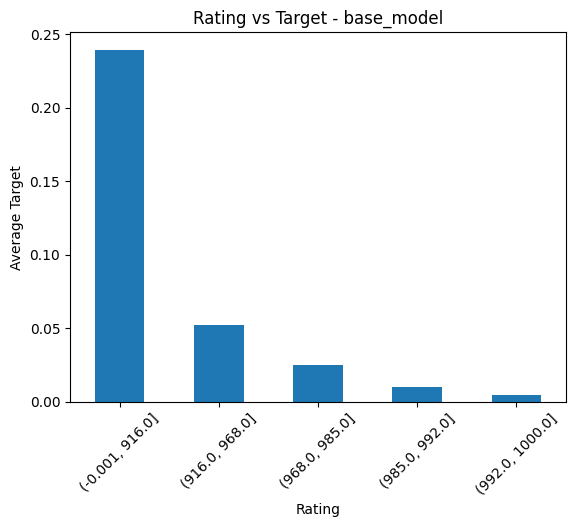

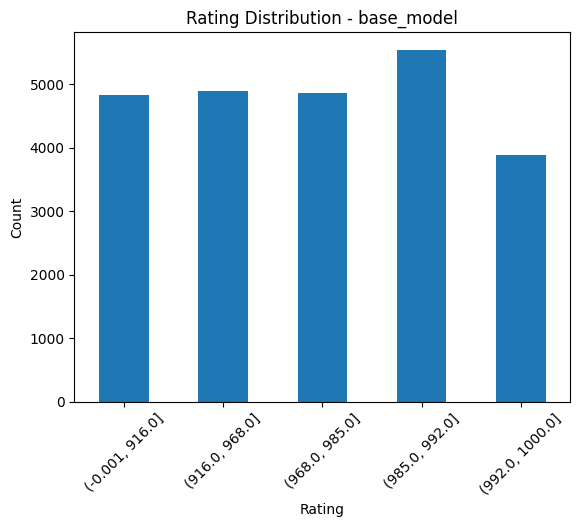

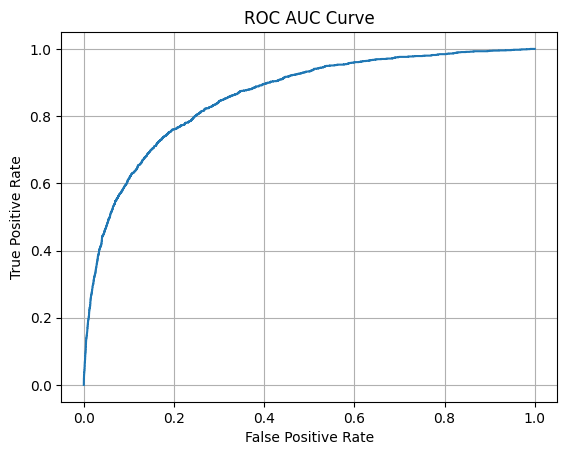

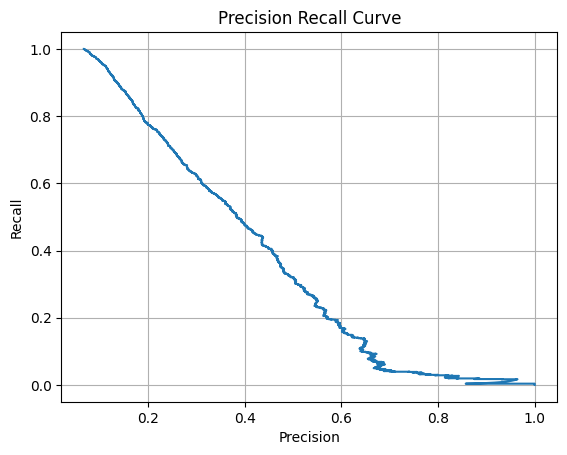

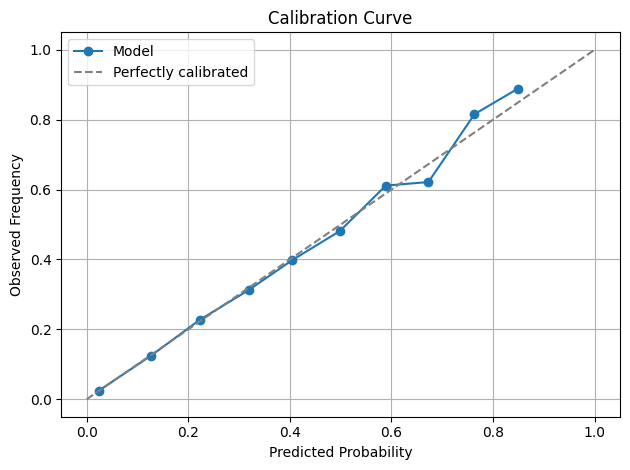

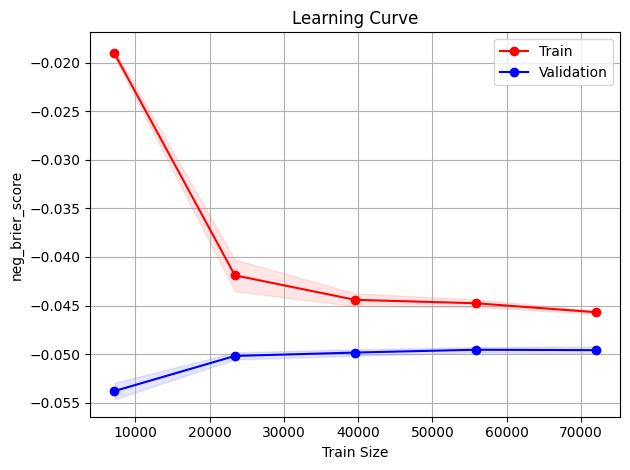

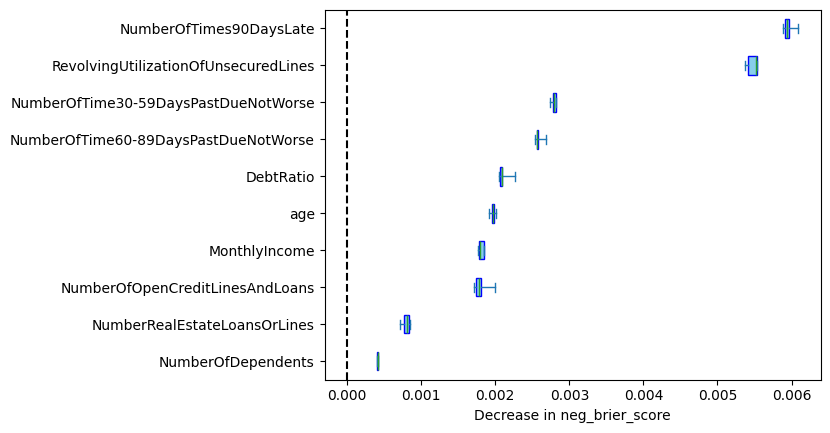

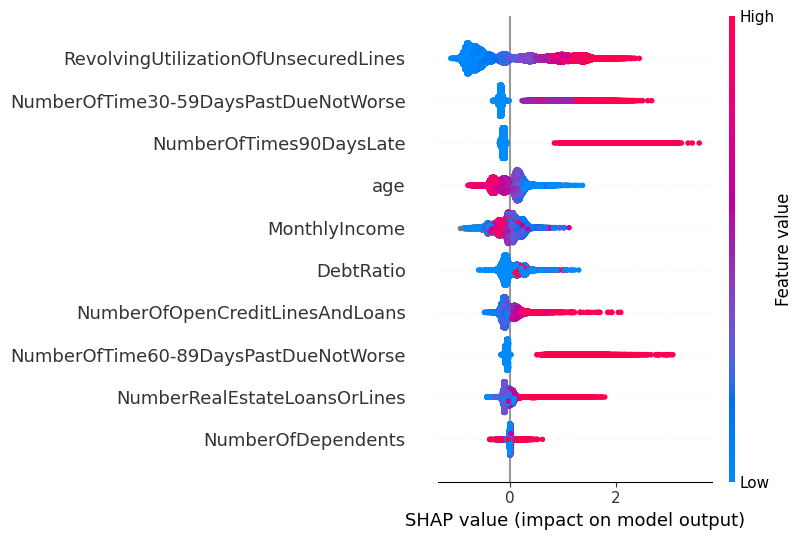

best_feature_model Results


Dataset  Treshold  Balanced Accuracy  Precision    Recall        F1  \
0   Train  0.231156           0.728218   0.435477  0.503158  0.466877   
1   Valid  0.221106           0.719386   0.415428  0.487947  0.448777   
2    Test  0.180905           0.728365   0.376871  0.518080  0.436335   

        AUC        KS     Brier  
0  0.875254  0.588513  0.047296  
1  0.857136  0.561592  0.049173  
2  0.854262  0.549920  0.049788

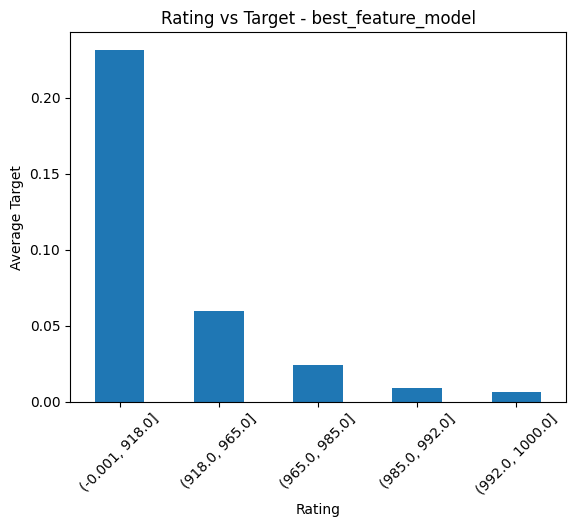

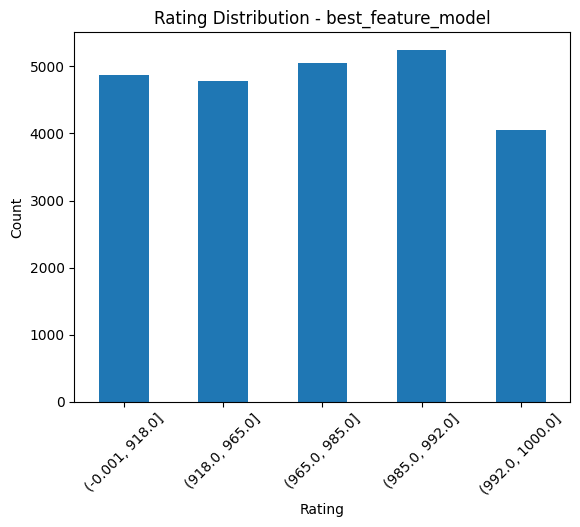

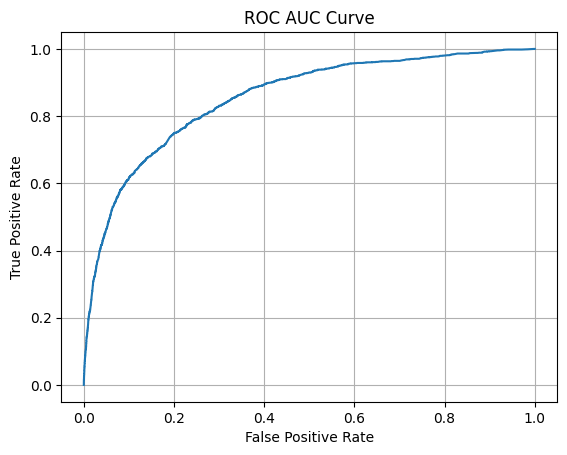

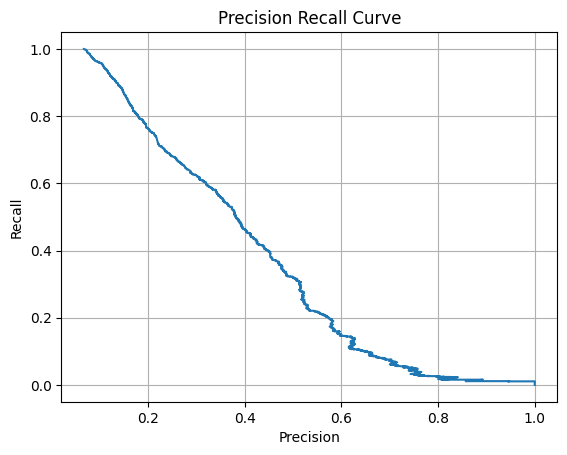

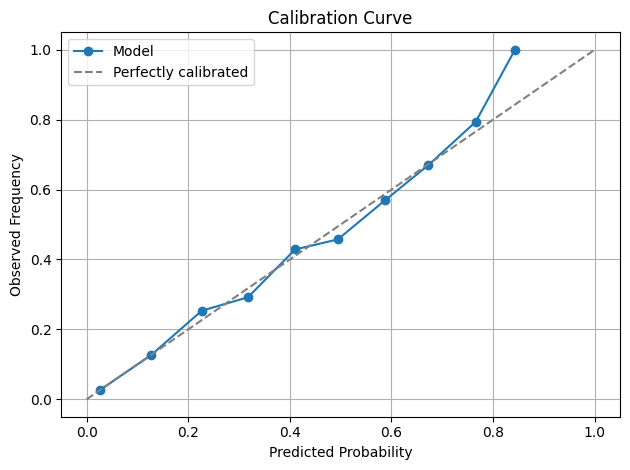

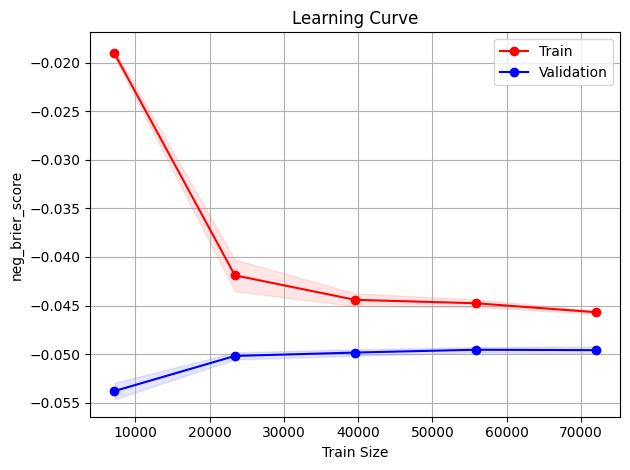

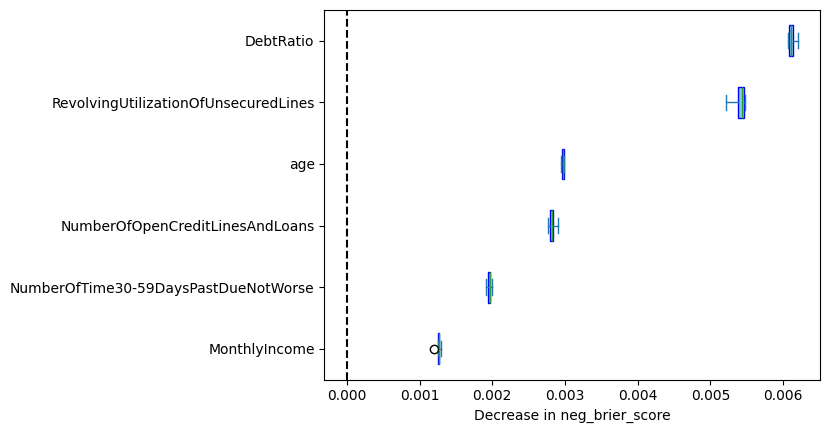

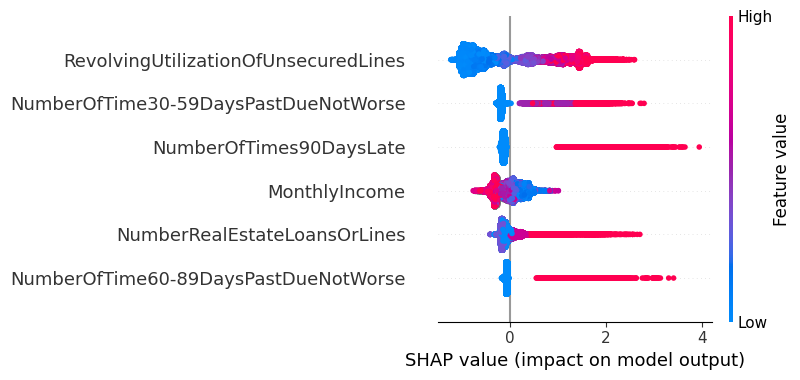

best_params_model Results


Dataset  Treshold  Balanced Accuracy  Precision    Recall        F1  \
0   Train  0.236181           0.717600   0.433959  0.480053  0.455844   
1   Valid  0.211055           0.723052   0.420254  0.495012  0.454580   
2    Test  0.180905           0.728276   0.378304  0.517456  0.437072   

        AUC        KS     Brier  
0  0.868012  0.573338  0.048215  
1  0.858951  0.563648  0.048833  
2  0.855513  0.552913  0.049518

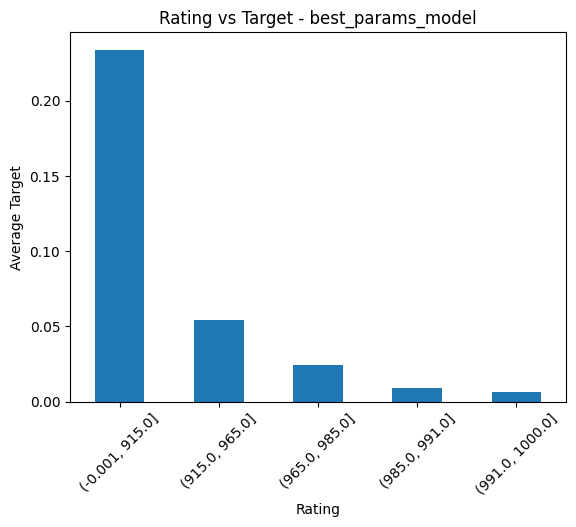

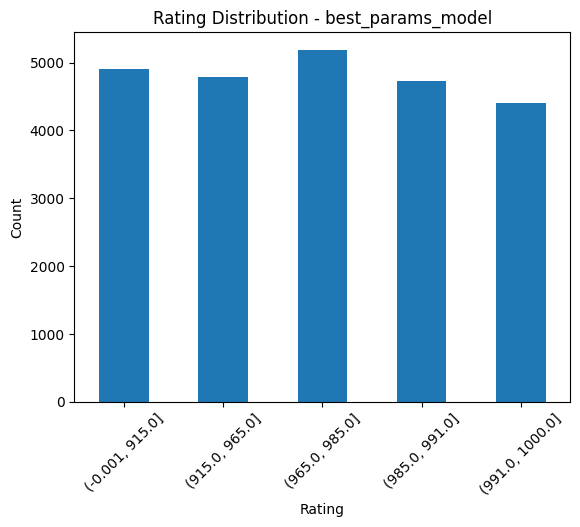

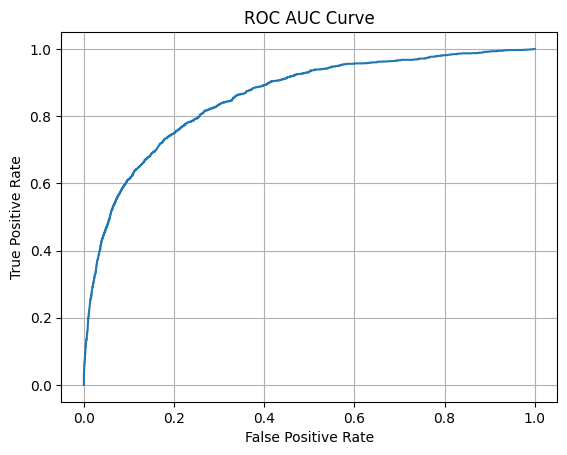

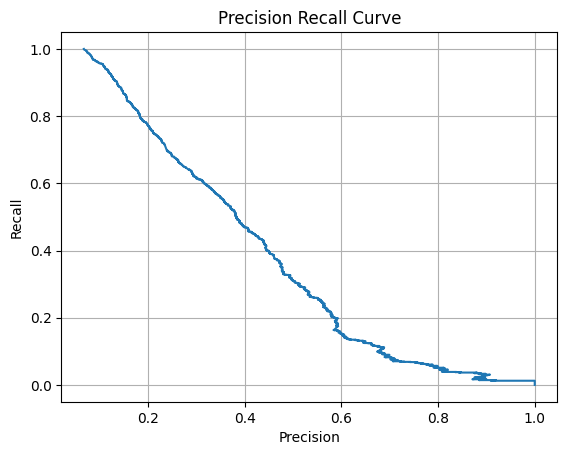

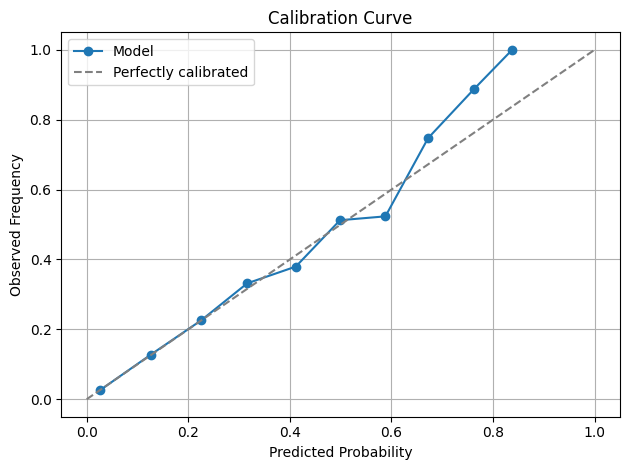

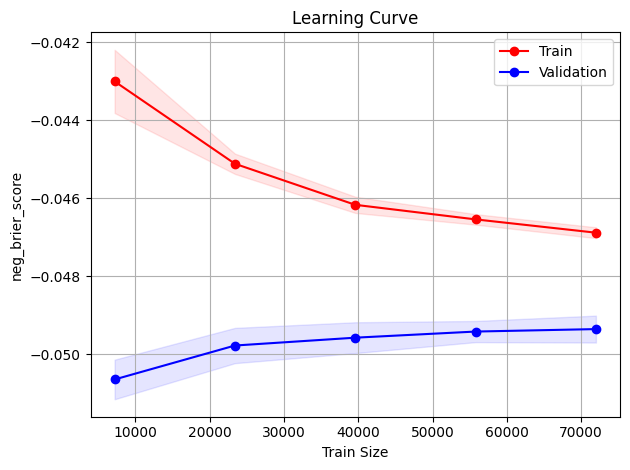

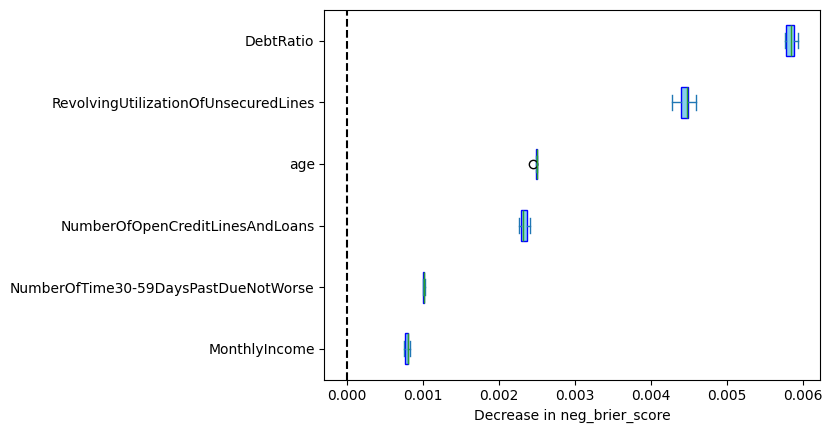

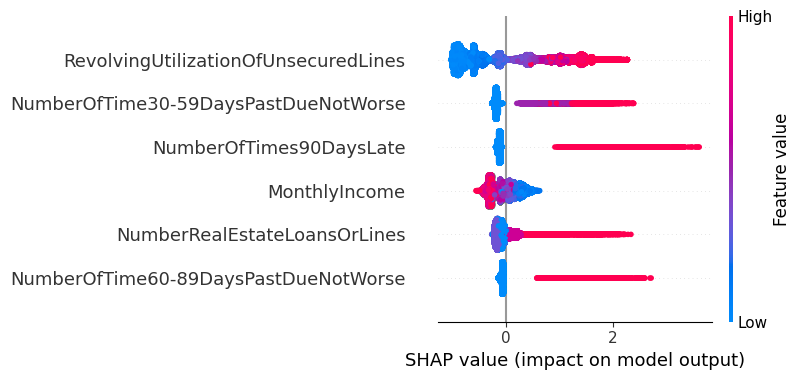

In [20]:
a.get_result_analysis()

In [21]:
acv = AutoMLHistGradientBoostingClassifierCV(
    X_train, y_train, 
    X_test, y_test, 
    target='target', 
    best_features=best_features_class,
    n_trials=50,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='brier'
)

In [22]:
acv.train()

In [23]:
acv.get_metrics()

Dataset  Treshold  Balanced Accuracy  Precision    Recall        F1  \
0  Train CV  0.500000           0.582406   0.582198  0.173873  0.266999   
1      Test  0.266332           0.699536   0.437616  0.439526  0.438569   
2  Train CV  0.500000           0.579675   0.577322  0.168221  0.260312   
3      Test  0.180905           0.728365   0.376871  0.518080  0.436335   
4  Train CV  0.500000           0.584507   0.587485  0.178028  0.272981   
5      Test  0.170854           0.737953   0.365006  0.543641  0.436764   

        AUC        KS     Brier               Model  
0  0.862678  0.575505  0.049598          Base Model  
1  0.859912  0.563715  0.049492          Base Model  
2  0.856805  0.558057  0.049925  Best Feature Model  
3  0.854262  0.549920  0.049788  Best Feature Model  
4  0.858351  0.559157  0.049663   Best Params Model  
5  0.855852  0.553873  0.049535   Best Params Model

base_model Results


Dataset  Treshold  Balanced Accuracy  Precision    Recall        F1  \
0  Train CV  0.500000           0.582406   0.582198  0.173873  0.266999   
1      Test  0.266332           0.699536   0.437616  0.439526  0.438569   

        AUC        KS     Brier  
0  0.862678  0.575505  0.049598  
1  0.859912  0.563715  0.049492

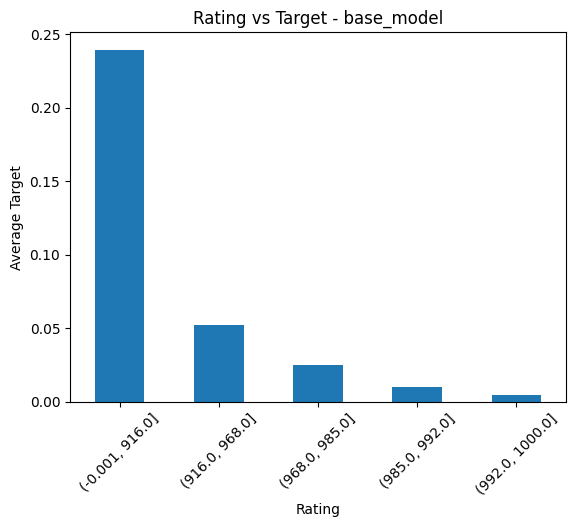

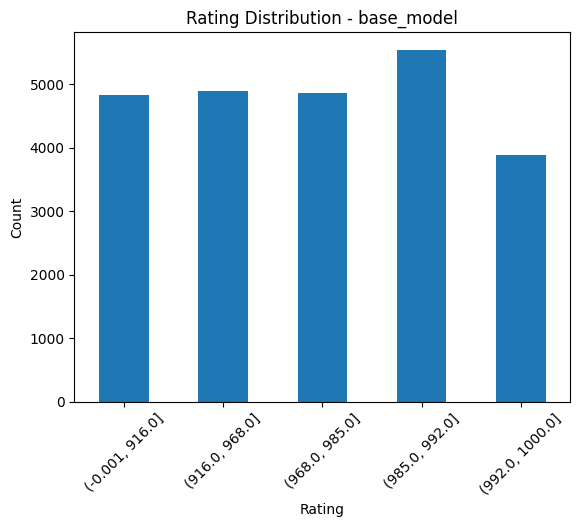

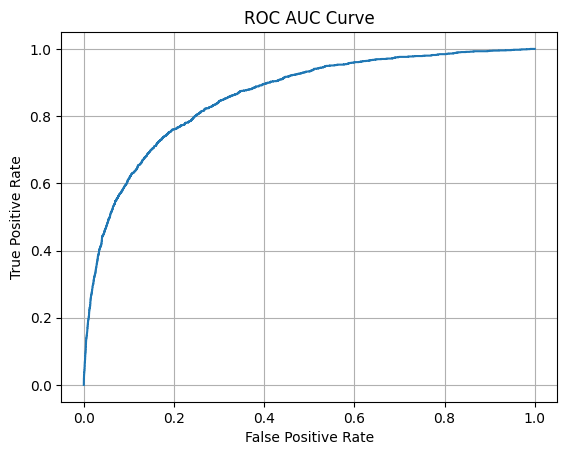

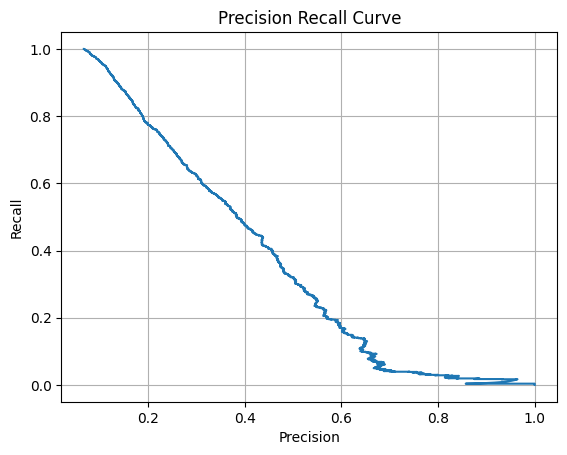

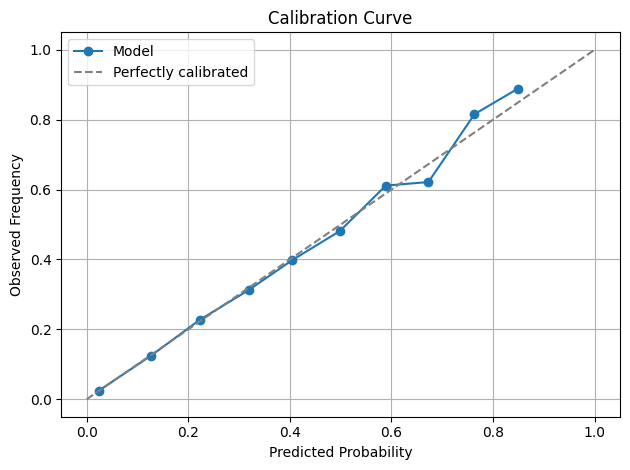

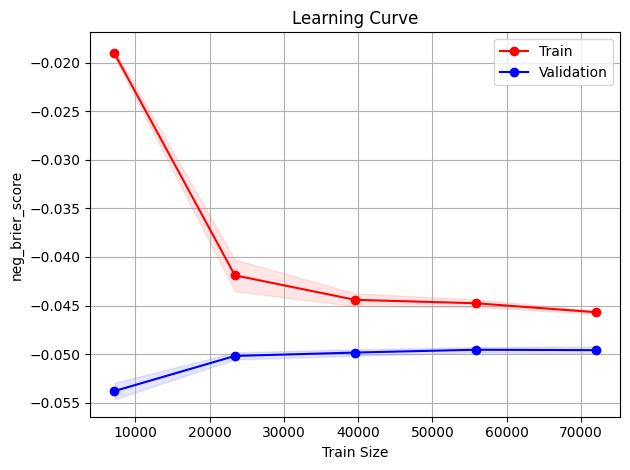

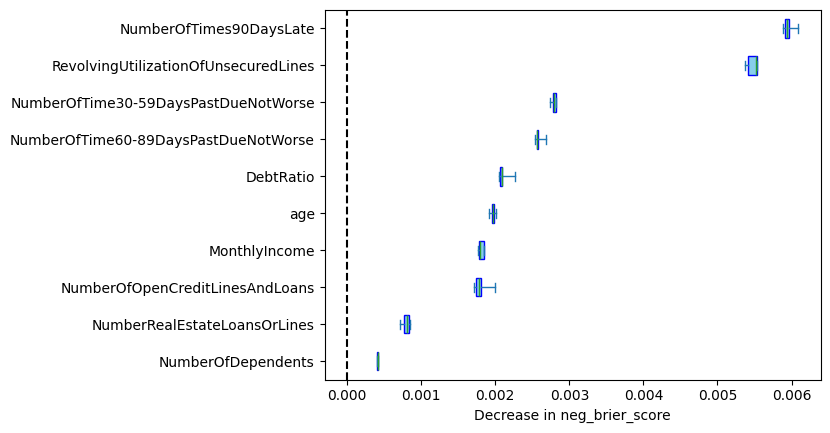

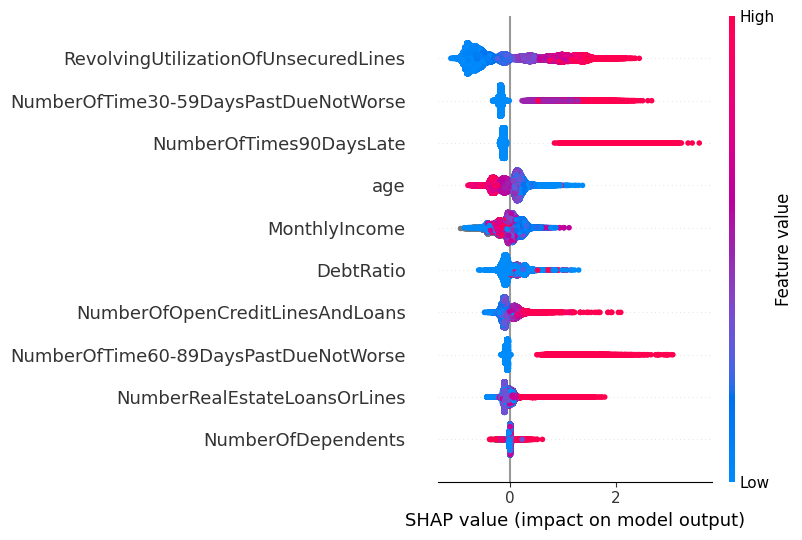

best_feature_model Results


Dataset  Treshold  Balanced Accuracy  Precision    Recall        F1  \
0  Train CV  0.500000           0.579675   0.577322  0.168221  0.260312   
1      Test  0.180905           0.728365   0.376871  0.518080  0.436335   

        AUC        KS     Brier  
0  0.856805  0.558057  0.049925  
1  0.854262  0.549920  0.049788

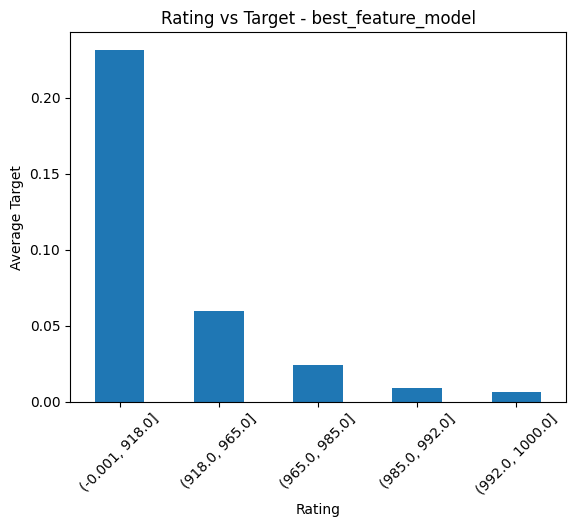

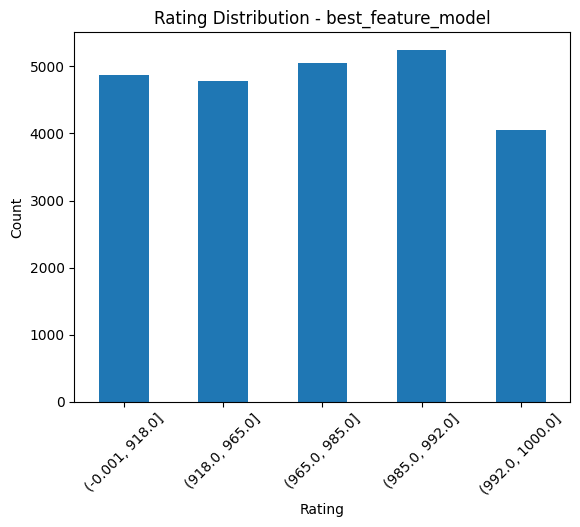

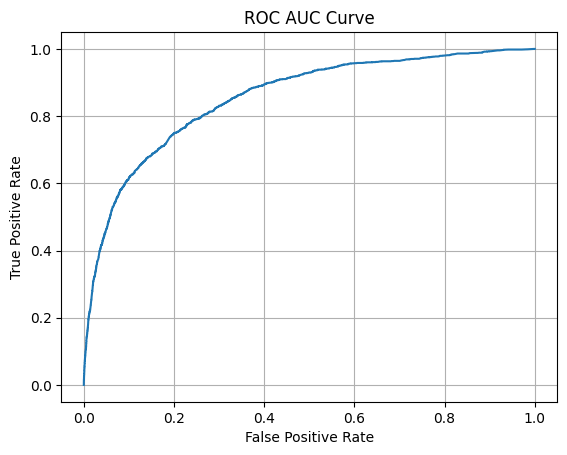

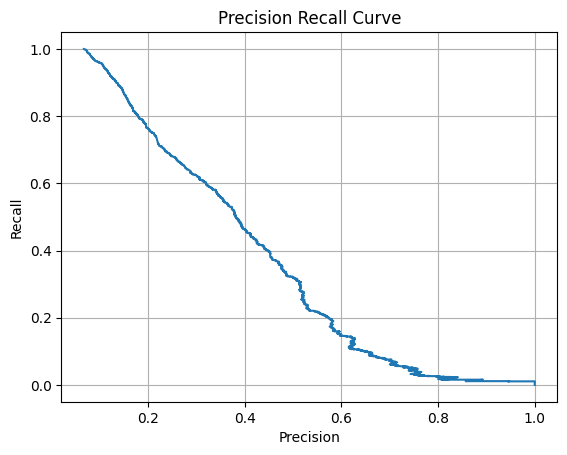

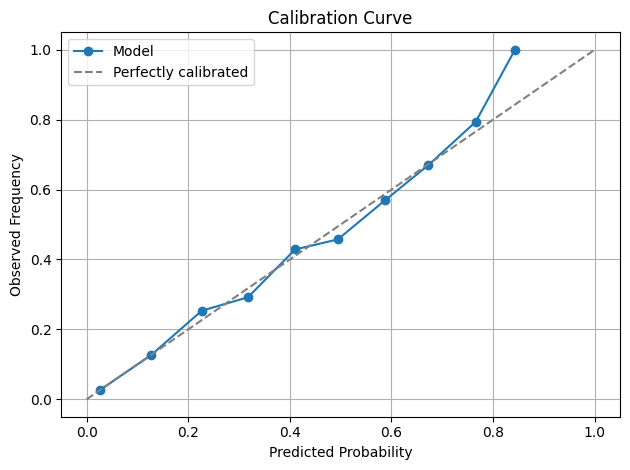

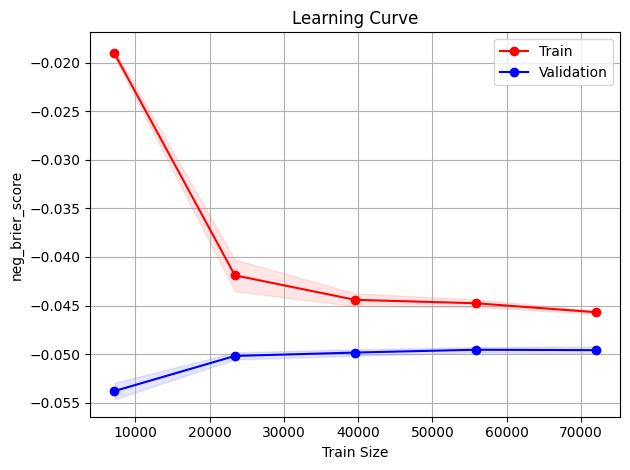

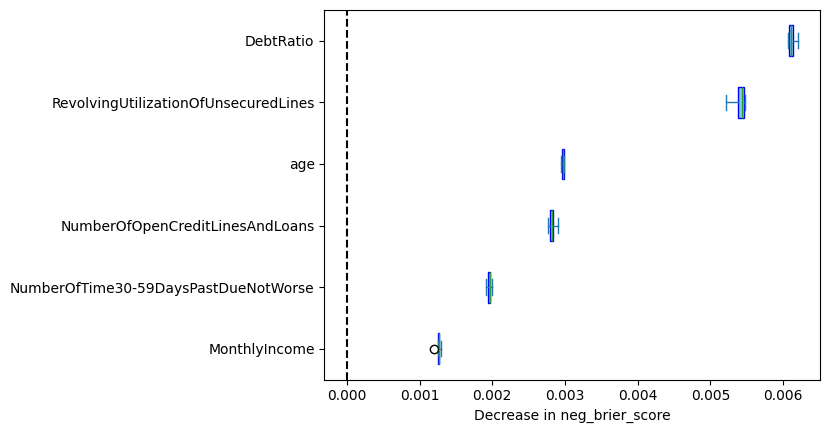

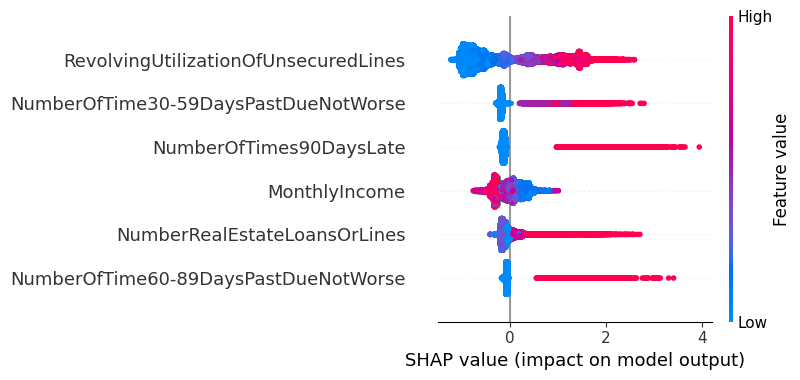

best_params_model Results


Dataset  Treshold  Balanced Accuracy  Precision    Recall        F1  \
0  Train CV  0.500000           0.584507   0.587485  0.178028  0.272981   
1      Test  0.170854           0.737953   0.365006  0.543641  0.436764   

        AUC        KS     Brier  
0  0.858351  0.559157  0.049663  
1  0.855852  0.553873  0.049535

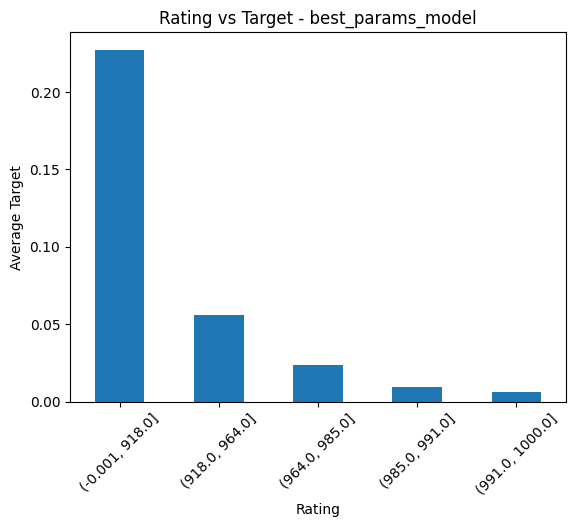

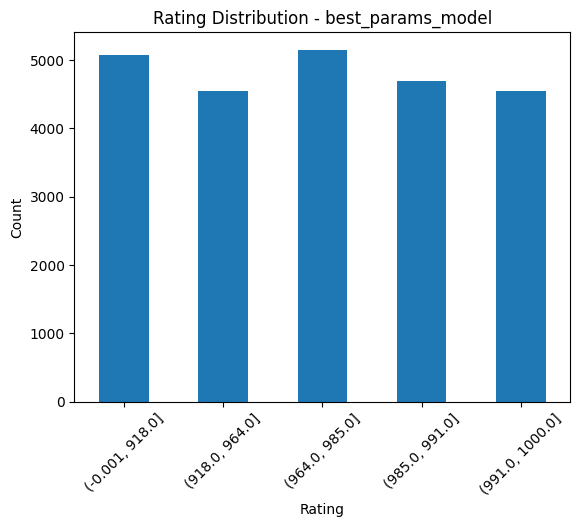

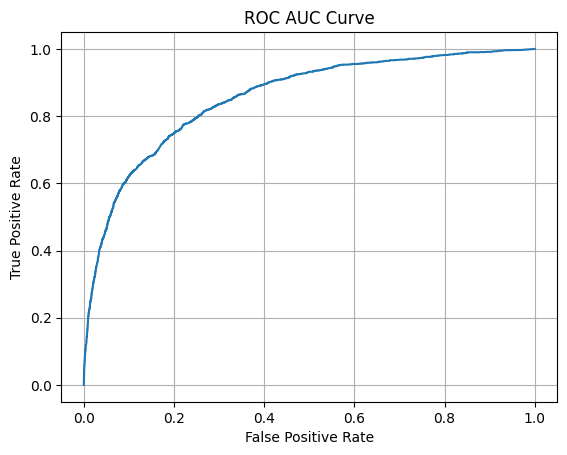

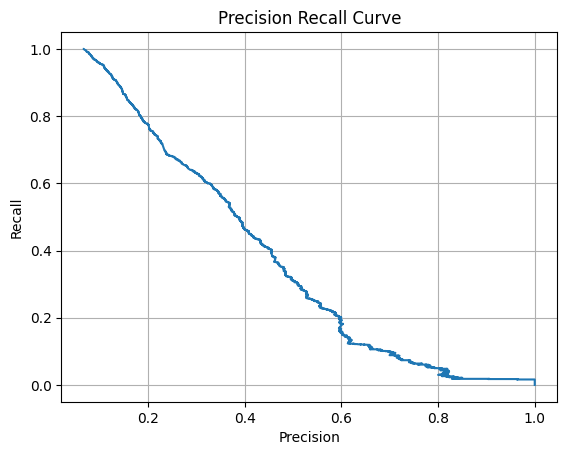

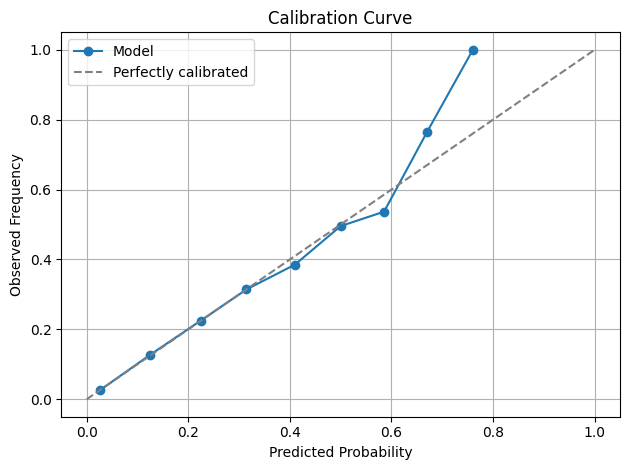

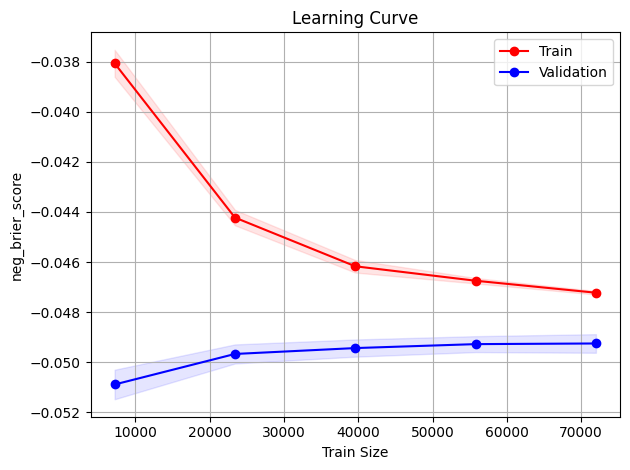

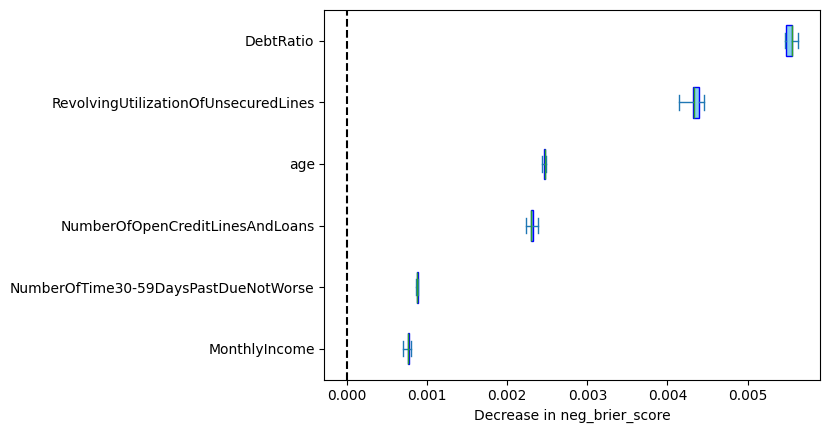

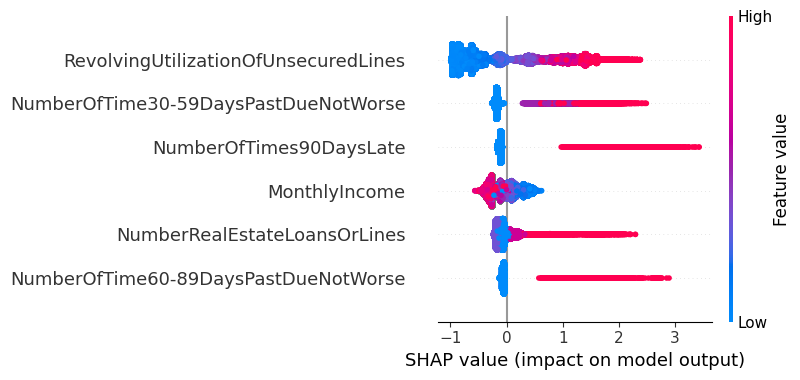

In [24]:
acv.get_result_analysis()